<div style="border:solid green 2px; padding: 20px">
    
<b>Михаил, привет! Это Александр Матвеевский</b> Я рад тебя видеть на финальном спринте (SQL).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в пачке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

# Проекст по SQL

**Описание работы:** Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель:** изучить базу даннных и сформулировать ценность нового продукта

**Описание данных:** 

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

Содержание работы:
1. Подключение к БД и просмотр имеющихся таблиц
2. Исследование таблиц и вывод по требуемым вопросам:
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.
3. Вывод


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Здорово, что не забываешь про оформление проекта
</div>

## Подключение к БД и просмотр таблиц

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, используем Pandas

In [2]:
for query in ['''SELECT *
FROM authors ''', '''SELECT *
FROM books''', '''SELECT *
FROM ratings''', '''SELECT *
FROM reviews''', '''SELECT *
FROM publishers''']:
    data = pd.io.sql.read_sql(query, con = engine)
    display(data.head(), display(data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


None

Запишем каждую таблицу в переменную:

In [3]:
def get_data(table, engine):
    
    """ Функция для получения данных из таблицы в БД """
    
    query = '''SELECT * FROM {}'''.format(table)
    data = pd.io.sql.read_sql(query, con = engine)
    print("Таблица", table)
    display(data.head(), display(data.info()))
    print()
    return data

books = get_data('books', engine)
authors = get_data('authors', engine)
ratings = get_data('ratings', engine)
reviews = get_data('reviews', engine)
publishers = get_data('publishers', engine)

Таблица books
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


None


Таблица authors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


None


Таблица ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


None


Таблица reviews
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


None


Таблица publishers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


None

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично первый взгляд на данные есть. Ты корректно выгрузил данные и посмотрел их содержимое
</div>

## Исследование таблиц

На данном этапе нам необходимо по каждой таблице сделать SQL запрос и вывести требуемые данные

### Сколько книг вышло после 1 января 2000 года

In [4]:
query = '''
SELECT COUNT(*)
FROM books
WHERE CAST(publication_date AS TIMESTAMP)>=CAST('2000-01-01' AS TIMESTAMP)
'''

data_books = pd.io.sql.read_sql(query, con = engine)
display(data_books)

,count
0,821


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Расчёт верный
</div>

### Сколько вышло обзоров для каждой книги и какая средняя оценка

In [5]:
query = '''
SELECT b.title,
         COUNT(DISTINCT rw.review_id),
         ROUND(AVG(r.rating),
         2) AS R
FROM books AS b LEFT OUTER
JOIN reviews AS rw
    ON rw.book_id = b.book_id LEFT OUTER
JOIN ratings AS r
    ON r.book_id = b.book_id
GROUP BY  b.book_id
ORDER BY  R DESC;
'''

count_avg = pd.io.sql.read_sql(query, con = engine)
count_avg

,title,count,r
0,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,Light in August,2,5.00
3,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3,2.25
996,His Excellency: George Washington,2,2.00
997,Drowning Ruth,3,2.00
998,Junky,2,2.00


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Грамотный шаг, что была добавлена колонка с названием книг
</div>

### Издательство, которое выпустило наибольшее число книг толще 50 страниц(исключим брошюры)

In [6]:
query = '''
SELECT p.publisher,
         COUNT(b.book_id)
FROM publishers AS p
JOIN books AS b
    ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY  p.publisher_id
ORDER BY  COUNT(b.book_id) DESC LIMIT 1
'''

publishers = pd.io.sql.read_sql(query, con = engine)
publishers

,publisher,count
0,Penguin Books,42


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Согласен с результатом. Действительно данное издательство является лидером по выпущенным книгам
</div>

### Определение автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [13]:
query = '''
SELECT a.author,
         AVG(r.rating) avg_rating
FROM authors AS a
JOIN books AS b
    ON a.author_id = b.author_id
JOIN ratings AS r
    ON b.book_id = r.book_id
WHERE b.book_id IN 
    (SELECT b.book_id
    FROM books AS b
    JOIN ratings AS r
        ON b.book_id=r.book_id
    GROUP BY  b.book_id
    HAVING COUNT(r.rating_id)>=50)
GROUP BY  a.author
ORDER BY  avg_rating DESC LIMIT 1
'''

author_max = pd.io.sql.read_sql(query, con = engine)
author_max

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Но у Дианы Габалдон всего 50 оценок по всем кигам :глаза: Стоит попробовать сначала выбирать книги, а уже к ним присоединять информацию по автору

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправил. Вывод скорректировал</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
    
После стольких лет? Всегда...

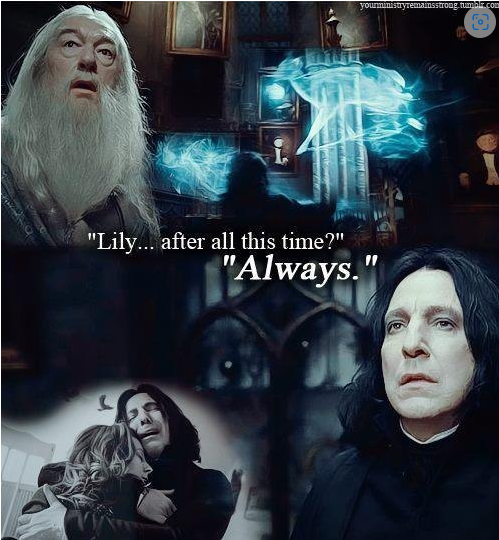

### Расчет среднего количества обзоров от пользователей, которые поставили больше 48 оценок

In [ ]:
query = '''
WITH A AS 
    (SELECT username,
         count(review_id)
    FROM reviews
    WHERE username IN 
        (SELECT username
        FROM ratings
        GROUP BY  username
        HAVING count(rating_id)>48)
        GROUP BY  username)
    SELECT round (SUM (COUNT) / COUNT(COUNT),
         2) AS AVG
FROM A
'''

users = pd.io.sql.read_sql(query, con = engine)
users

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты корректно отобрал пользователей и рассчитал их показатели.

## Вывод

Был проведен анализ данных при помощи SQL запросов к БД. В нескольких таблиц тип данных нескольких столбцов определился не верно. Это небоходимо исправить, если потребуется какой-либо расчет. В ходе работы тип данных неоднократно правился для корректного выполнения условия задачи. Результат изучения: После 1 января 2000 года вышла 821 книга. По каждой книге было рассчитано количество обзоров и ее средний рейтинг. Самое популярное издательство которое выпустило наибольшее число книг толще 50 страниц это Penguin Books с кол-вом книг 42. Авто с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré с рейтингом 4,29 балла. Среднее количество обзоров от пользователей, которые поставили больше 48 оценок составило 24.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Получилась хорошая работа, развернутый итоговый вывод придает ей вид законченного проекта. Поздравляю с окончанием курса! У тебя получилось справиться со всеми задачами. 
</div>